# Daegu Apartment

## Context
Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

## Features
Hallway Type: Apartment type

TimeToSubway: Time needed to the nearest subway station

SubwayStation: The name of the nearest subway station

N_FacilitiesNearBy(ETC): The number of facilities nearby

N_FacilitiesNearBy(PublicOffice): The number of public office facilities nearby

N_SchoolNearBy(University): The number of universities nearby

N_Parkinglot(Basement): The number of the parking lot

YearBuilt: The year the apartment was built

N_FacilitiesInApt: Number of facilities in the apartment

Size(sqft): The apartment size (in square feet)

SalePrice: The apartment price (Won)

# 1. Check for Data Quality


In [46]:
import pandas as pd

dataset = 'data_daegu_apartment.csv' #Input your own dataset

df = pd.read_csv(dataset)
# Check for empty data
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [48]:
# Check data structure & types
df.shape, df.dtypes

((4123, 11),
 HallwayType                          object
 TimeToSubway                         object
 SubwayStation                        object
 N_FacilitiesNearBy(ETC)             float64
 N_FacilitiesNearBy(PublicOffice)    float64
 N_SchoolNearBy(University)          float64
 N_Parkinglot(Basement)              float64
 YearBuilt                             int64
 N_FacilitiesInApt                     int64
 Size(sqf)                             int64
 SalePrice                             int64
 dtype: object)

## Duplicate Checking and Removal

In [50]:
# Check for duplicates
df.duplicated().sum()

1422

In [52]:
# Remove duplicates
df_old = df.copy()
df = df.drop_duplicates(inplace = False)

In [54]:
# Check for duplicates
df.duplicated().sum()

0

## Feature Engineering: Create a new column TimeToSubway_ID based on the given mapping
### Check unique value for TimeToSubway

In [56]:
df['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [58]:
time_to_subway_mapping = {
    '0-5min': 0,
    '5min~10min': 1,
    '10min~15min': 2,
    '15min~20min': 3,
    'no_bus_stop_nearby': 4
}

df['TimeToSubway_ID'] = df['TimeToSubway'].map(time_to_subway_mapping)

# Check the updated dataframe
df[['TimeToSubway', 'TimeToSubway_ID']].head()

,TimeToSubway,TimeToSubway_ID
0,0-5min,0
1,10min~15min,2
2,15min~20min,3
3,5min~10min,1
4,0-5min,0


### Distribution of Interval Data

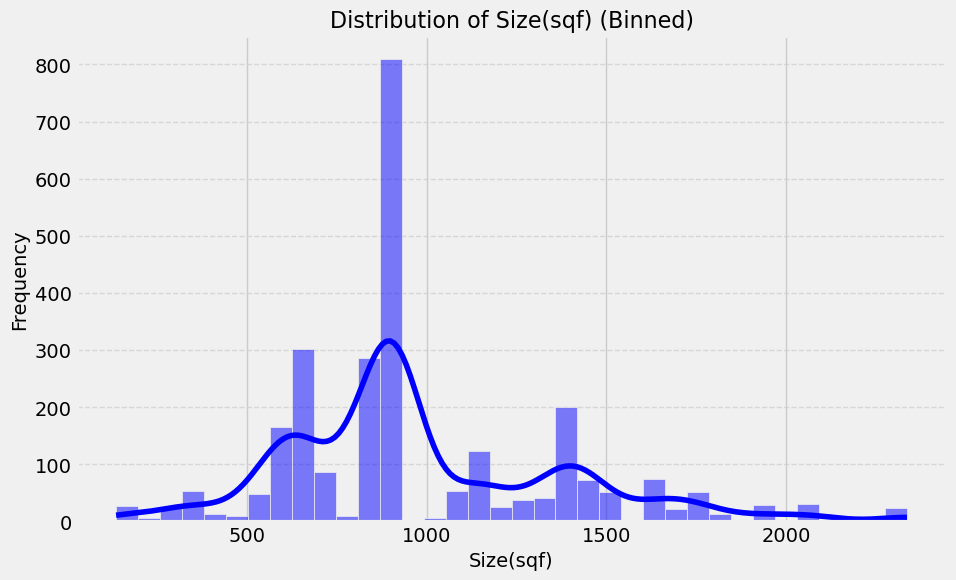

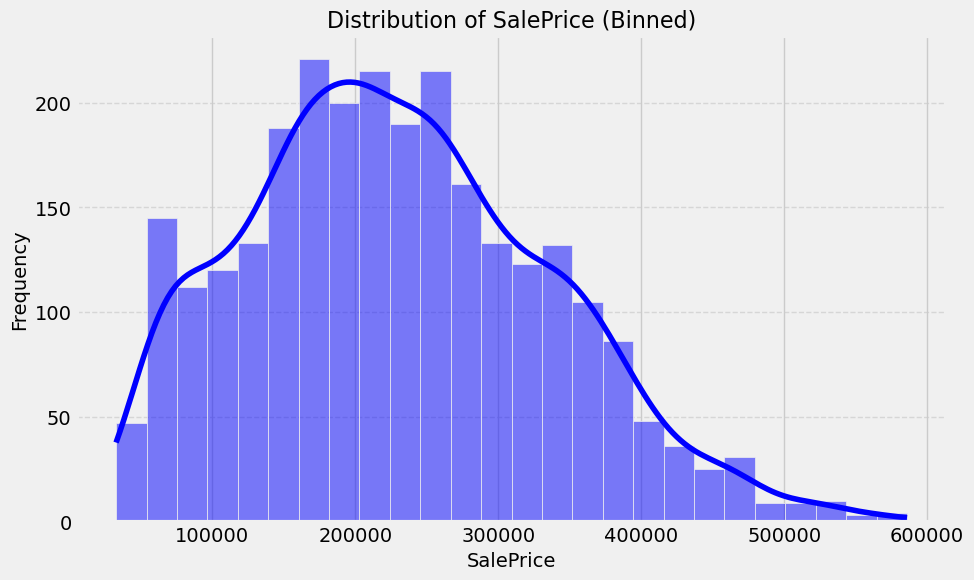

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    if df[column].nunique() >= 50:  # Only for numeric columns with unique values >= 50
        data = df[column].dropna()
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        bin_width = 2 * iqr / len(data)**(1/3)
        bins = int((data.max() - data.min()) / bin_width)

        plt.figure(figsize=(10, 6))
        sns.histplot(data, kde=True, bins=bins, color='blue')
        plt.title(f'Distribution of {column} (Binned)', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


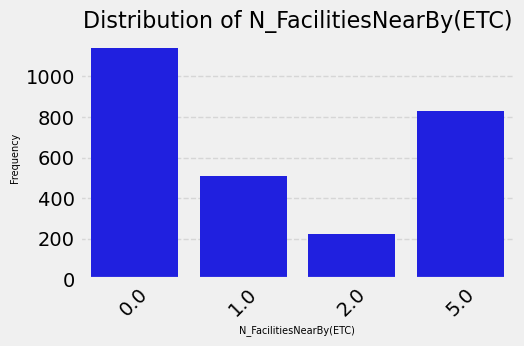

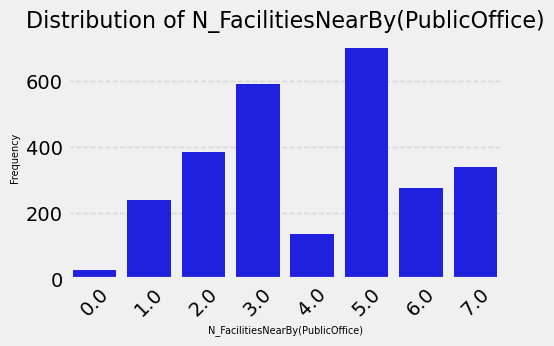

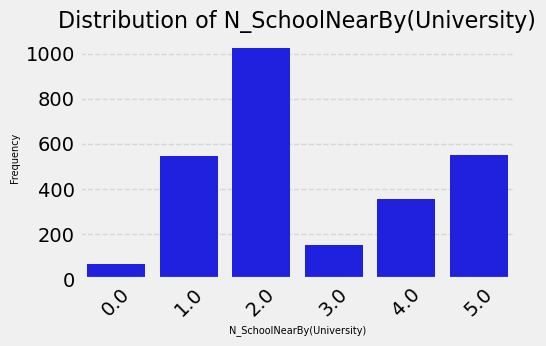

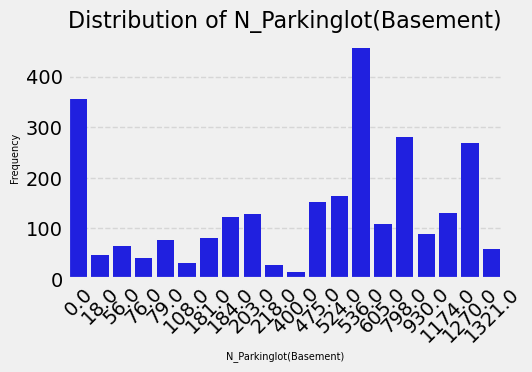

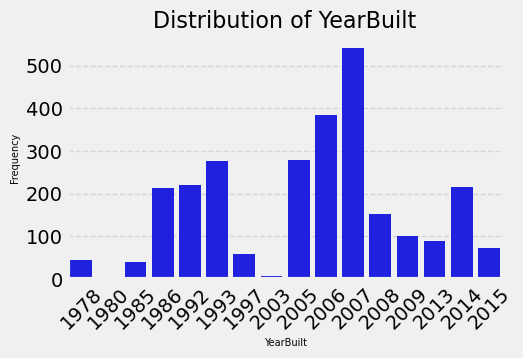

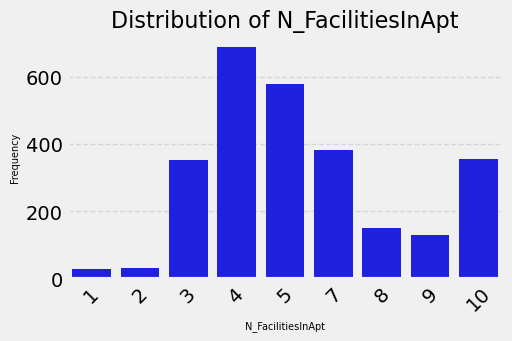

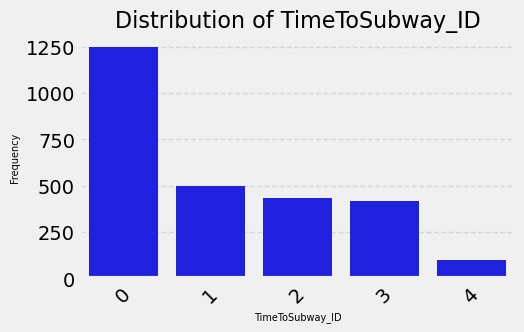

In [62]:
numeric_columns_small = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
                         if df[col].nunique() < 50]
for column in numeric_columns_small:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, color='blue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=7)
    plt.ylabel('Frequency', fontsize=7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()


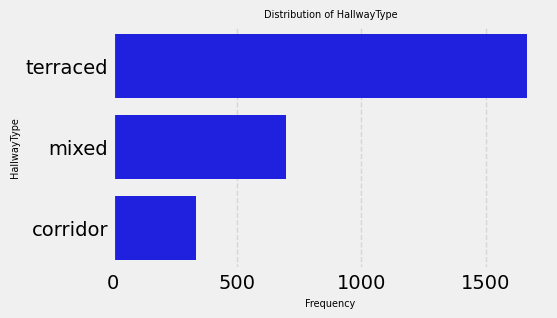

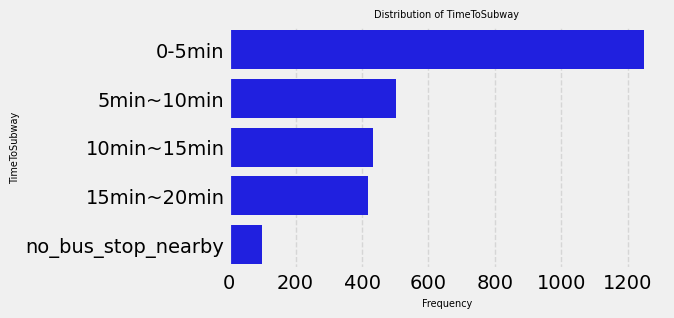

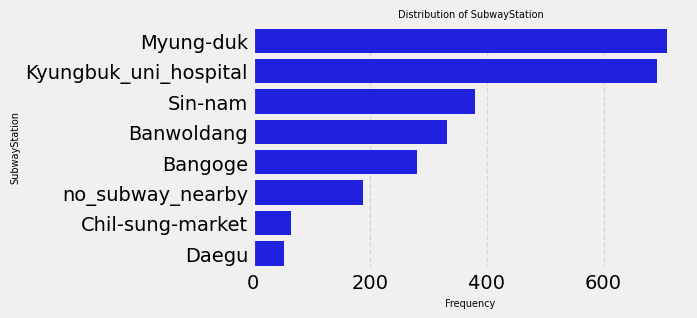

In [64]:
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
for column in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=df[column].value_counts().values, 
                y=df[column].value_counts().index, 
                color='blue')
    plt.title(f'Distribution of {column}', fontsize=7)
    plt.xlabel('Frequency', fontsize=7)
    plt.ylabel(column, fontsize=7)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\3877650441.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette="Blues_d")


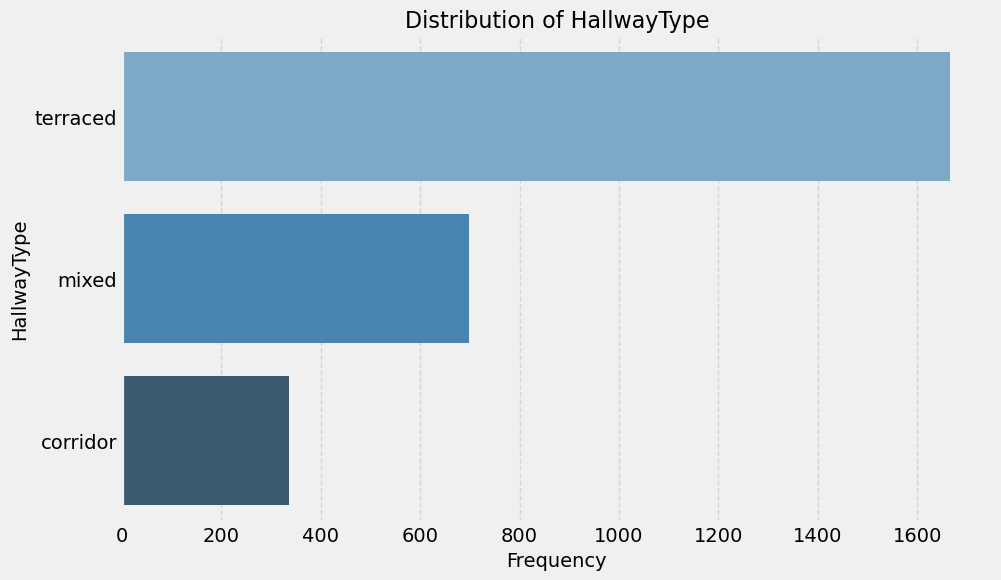

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\3877650441.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette="Blues_d")


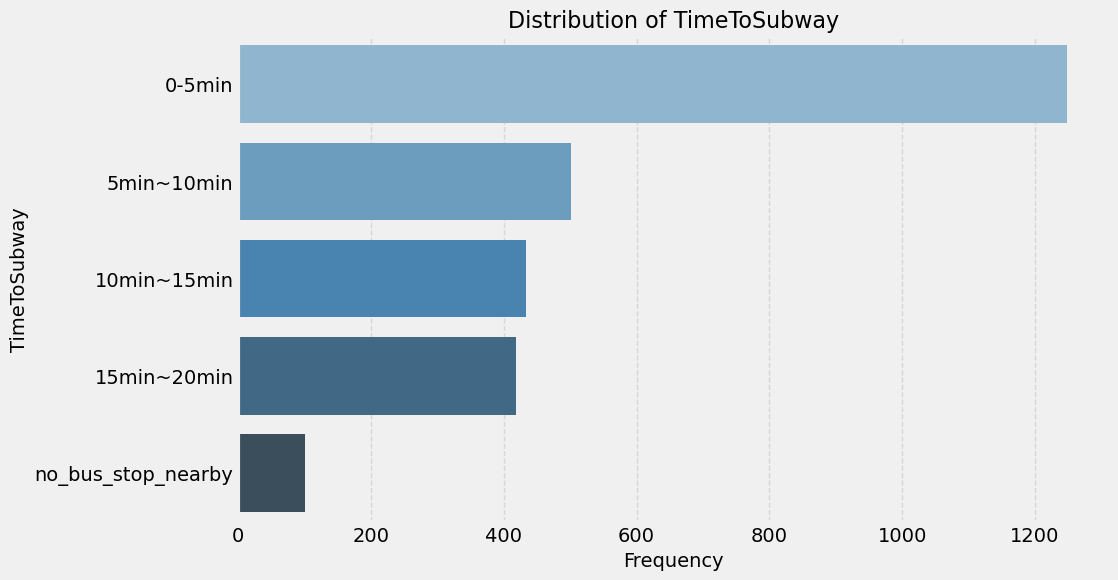

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\3877650441.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette="Blues_d")


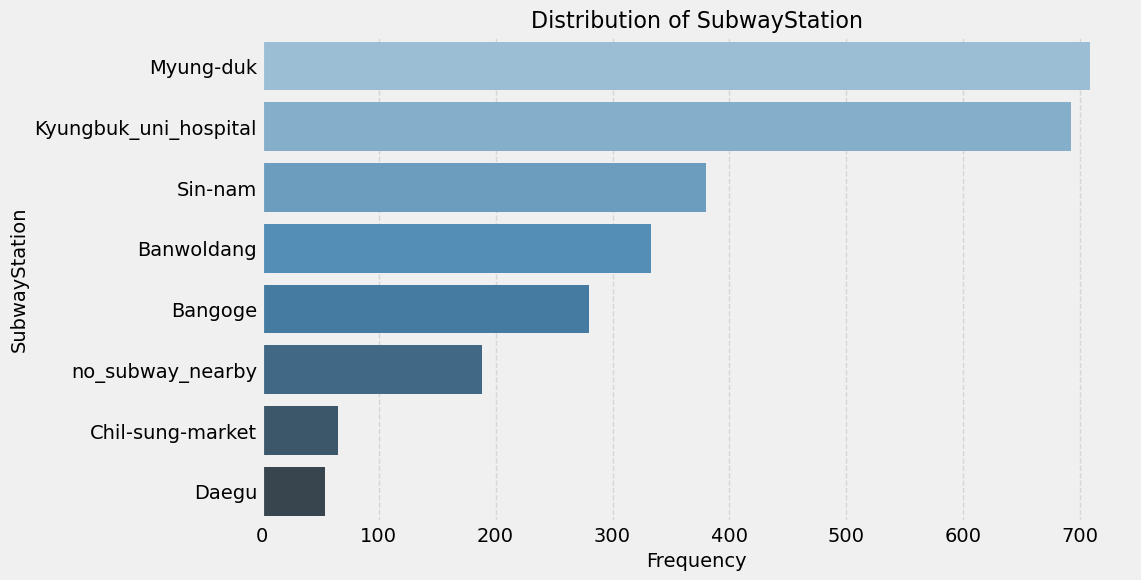

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\3877650441.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


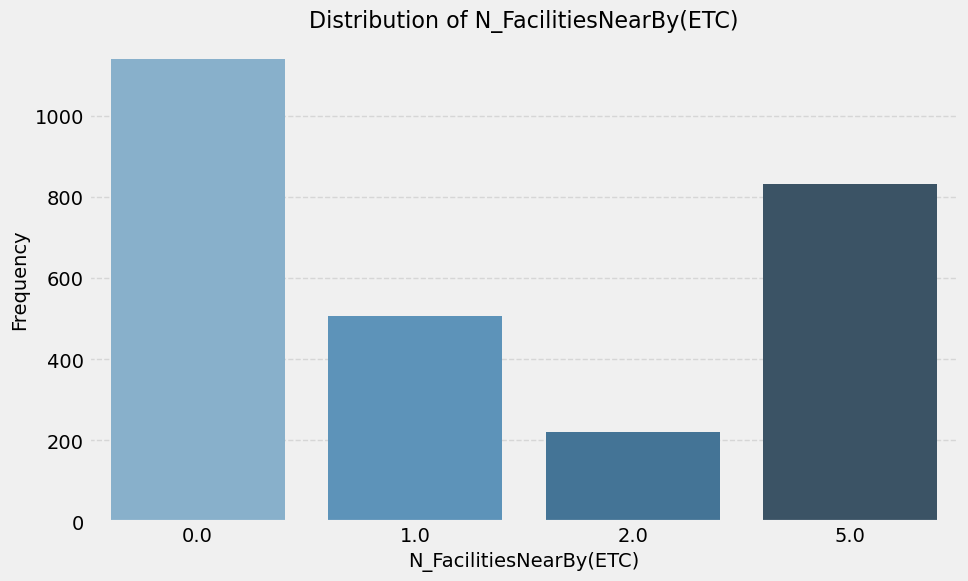

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\3877650441.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


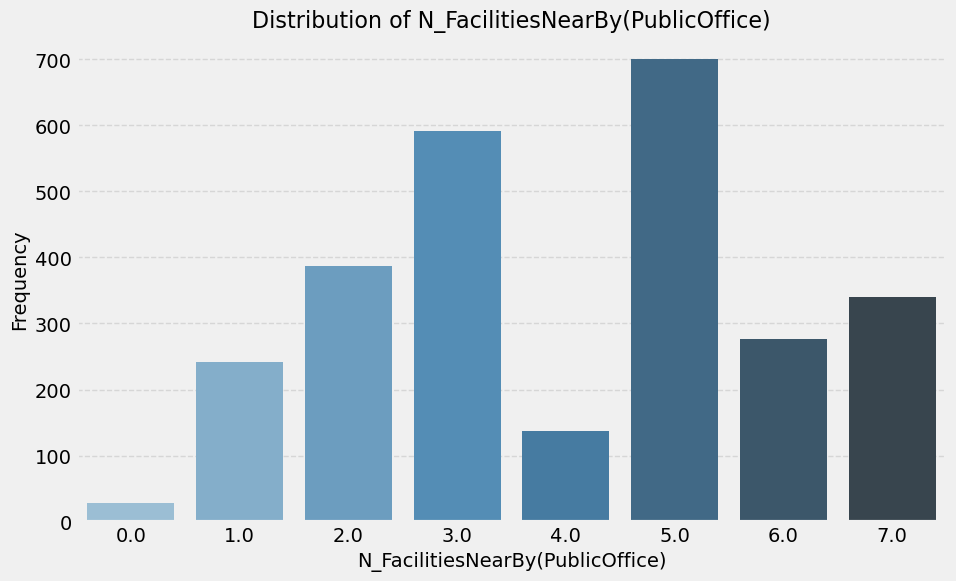

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\3877650441.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


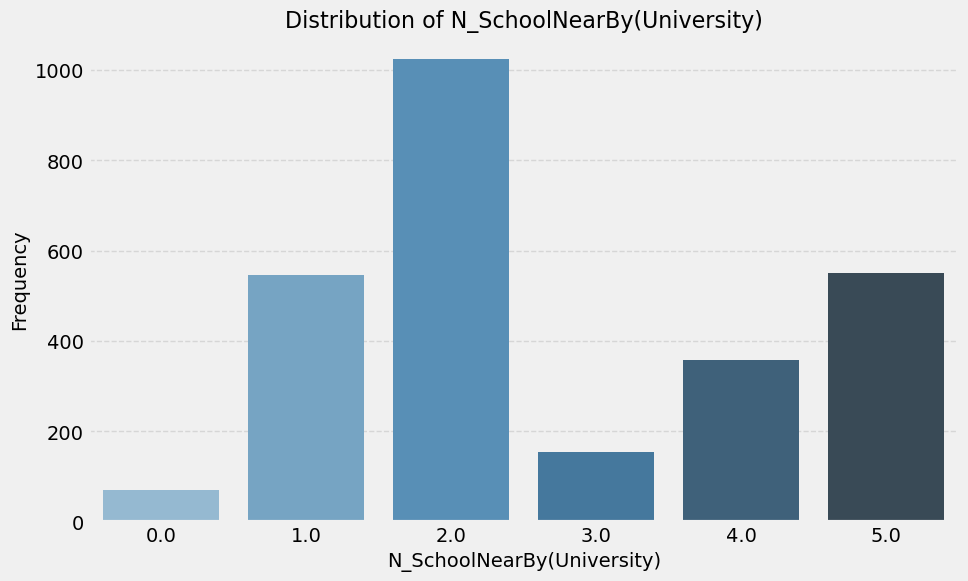

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\3877650441.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


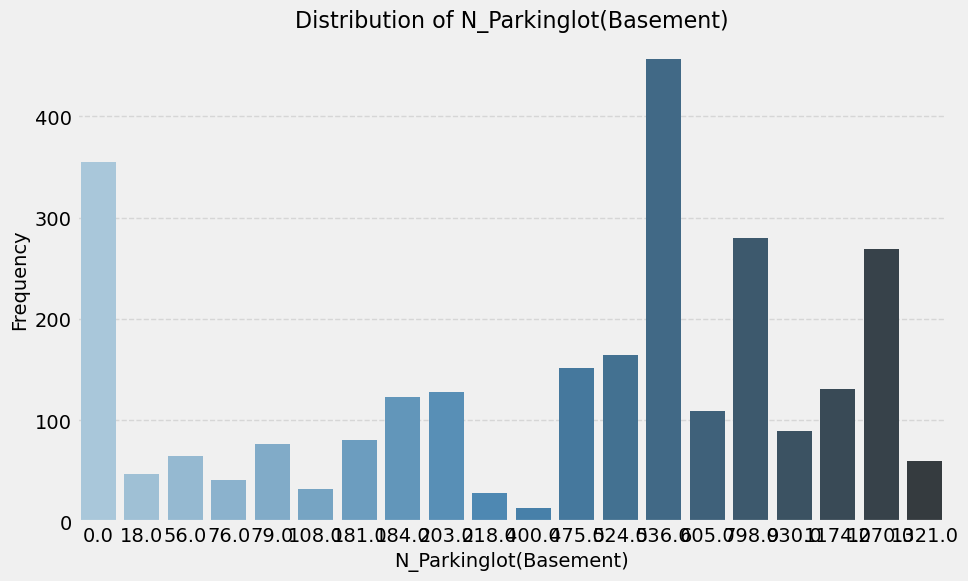

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\3877650441.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


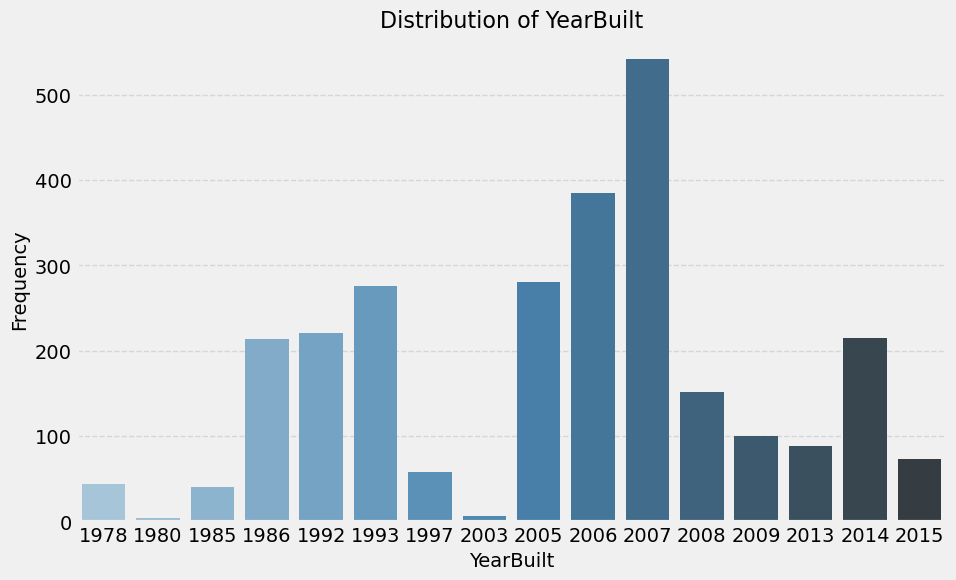

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\3877650441.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


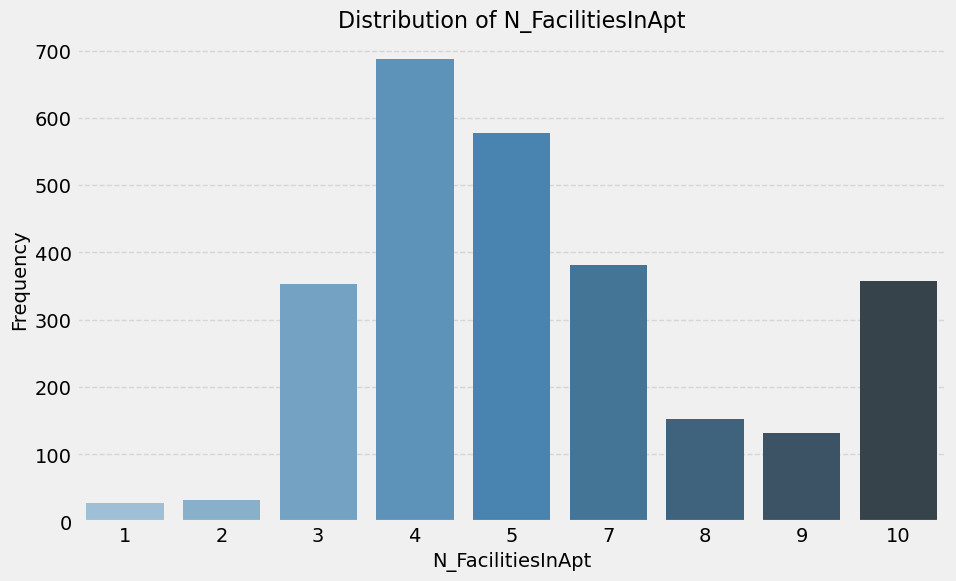

NameError: name 'freedman_diaconis_bins' is not defined

In [66]:
def visualize_distributions_fd_updated_v2(df):
    """
    Visualize distributions of each column in the DataFrame using:
    - Histograms for numeric columns with unique values >= 50 (Freedman-Diaconis rule for bins).
    - Bar charts for numeric columns with unique values < 50.
    - Horizontal bar plots for categorical columns.
    
    Args:
        df (DataFrame): The input DataFrame.
    """
    columns = df.columns
    for column in columns:
        if df[column].dtype in ['int64', 'float64']:  # Numeric columns
            unique_values = df[column].nunique()
            data = df[column].dropna()  # Remove NaN values

            if unique_values >= 50:  # Use histogram with Freedman-Diaconis rule for larger numeric data
                bins = freedman_diaconis_bins(data)
                
                plt.figure(figsize=(10, 6))
                sns.histplot(data, kde=True, bins=bins, color='blue')
                plt.title(f'Distribution of {column}', fontsize=16)
                plt.xlabel(column, fontsize=14)
                plt.ylabel('Frequency', fontsize=14)
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.show()
            
            else:  # Bar chart for numeric data with unique values < 50
                counts = data.value_counts().sort_index()
                
                plt.figure(figsize=(10, 6))
                sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")
                plt.title(f'Distribution of {column}', fontsize=16)
                plt.xlabel(column, fontsize=14)
                plt.ylabel('Frequency', fontsize=14)
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                plt.show()
        
        else:  # Categorical columns
            data = df[column].value_counts()
            
            plt.figure(figsize=(10, 6))
            sns.barplot(x=data.values, y=data.index, palette="Blues_d")
            plt.title(f'Distribution of {column}', fontsize=16)
            plt.xlabel('Frequency', fontsize=14)
            plt.ylabel(column, fontsize=14)
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            plt.show()

# Example usage:
visualize_distributions_fd_updated_v2(df)


C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


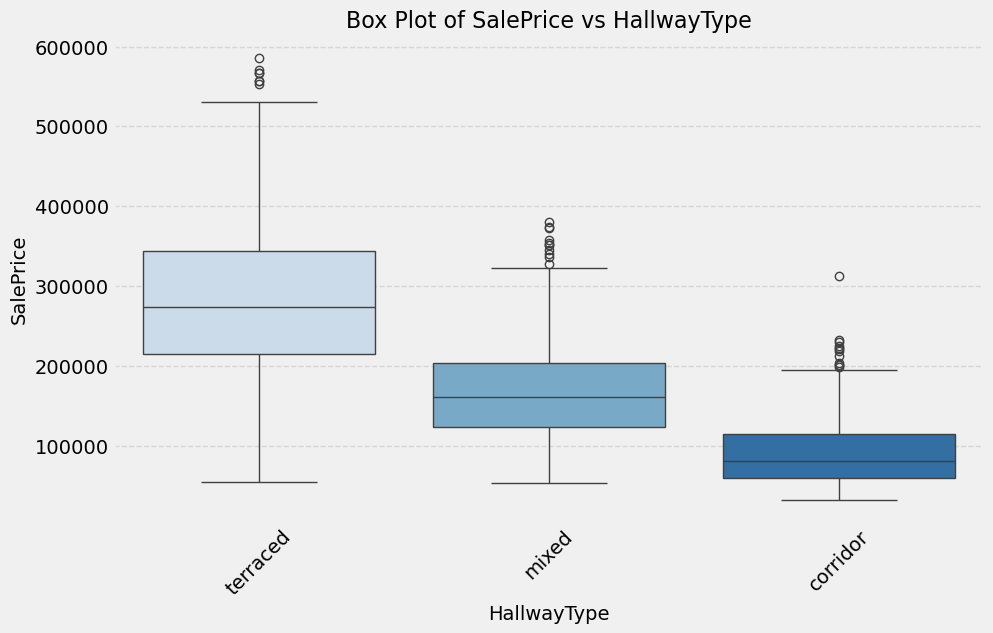

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


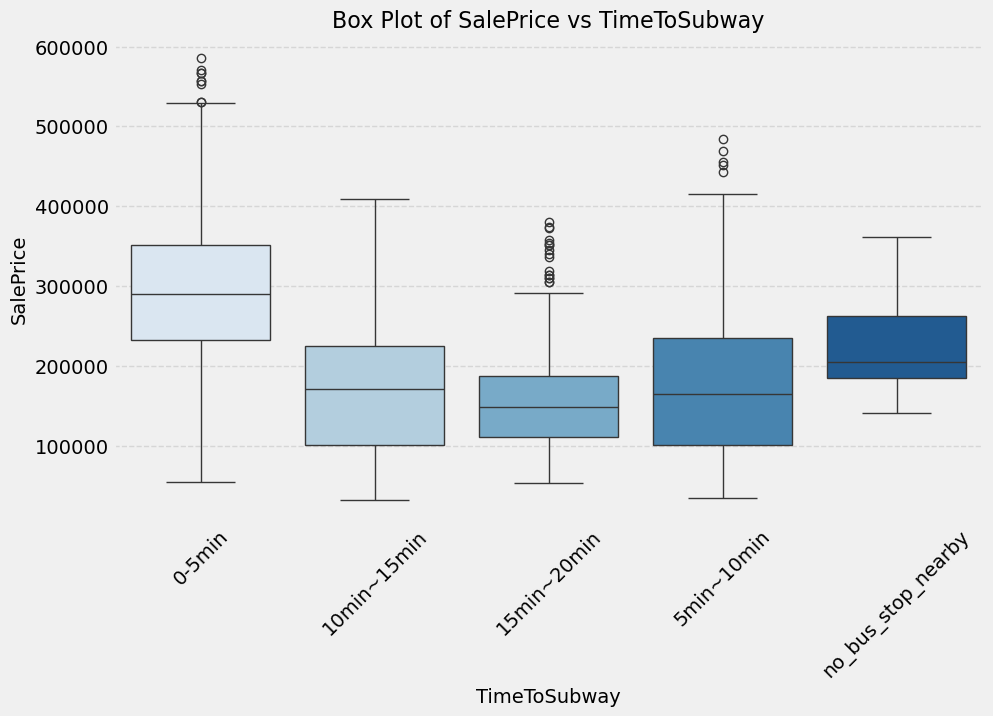

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


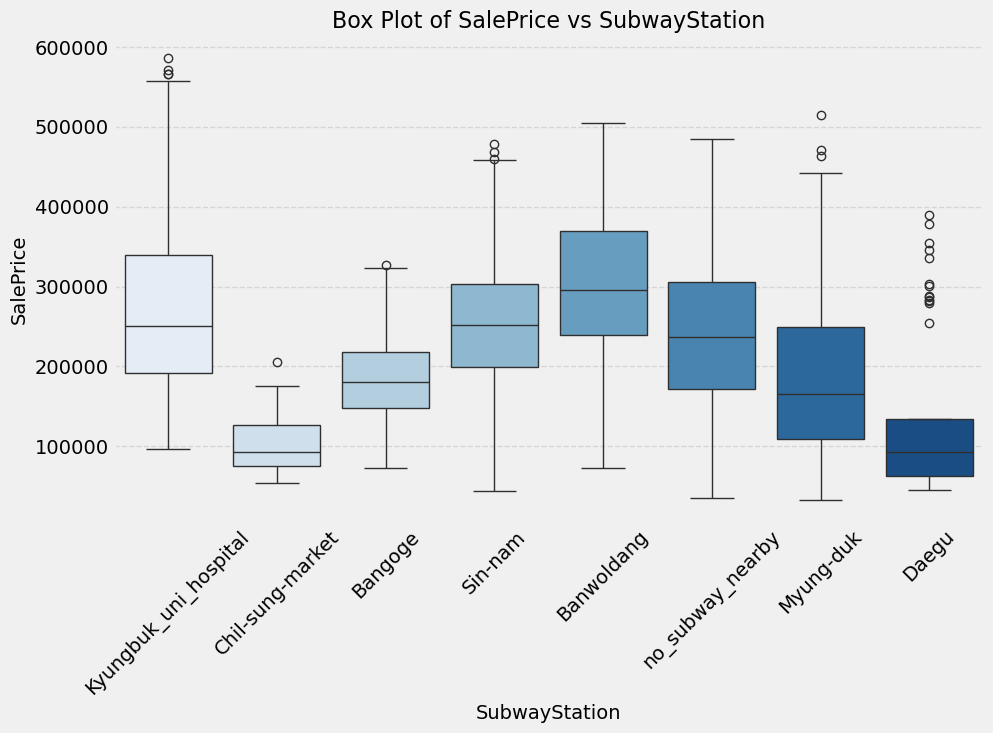

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


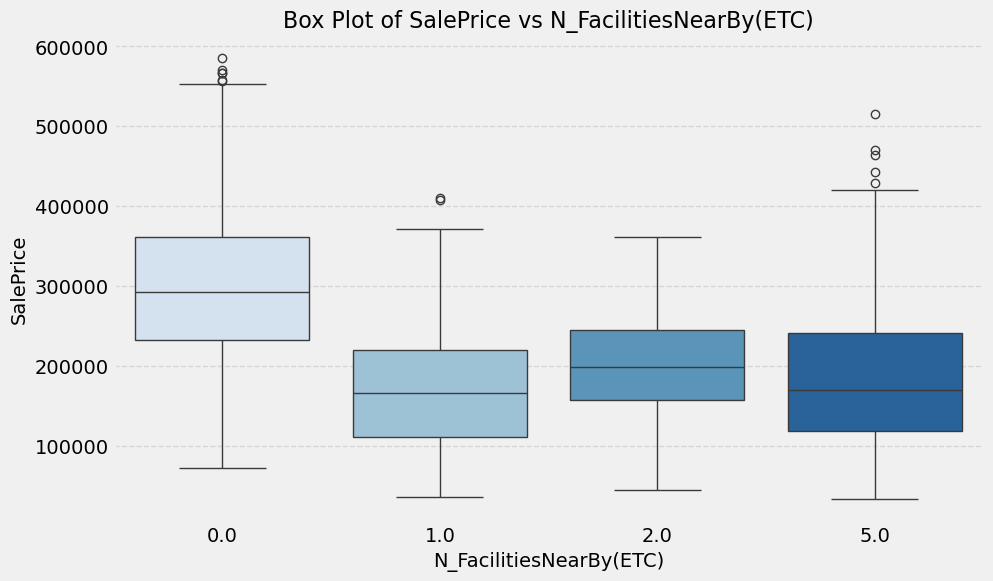

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


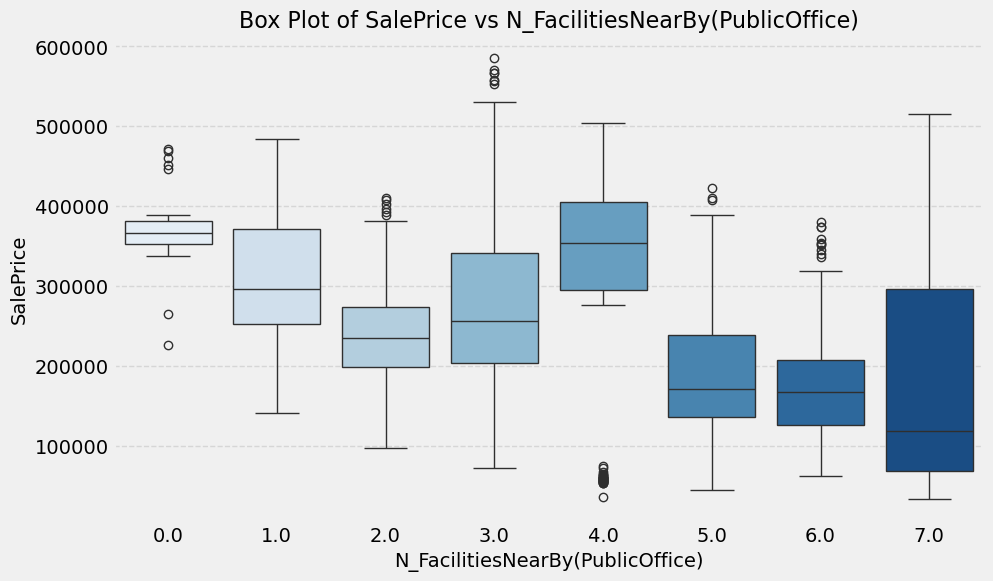

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


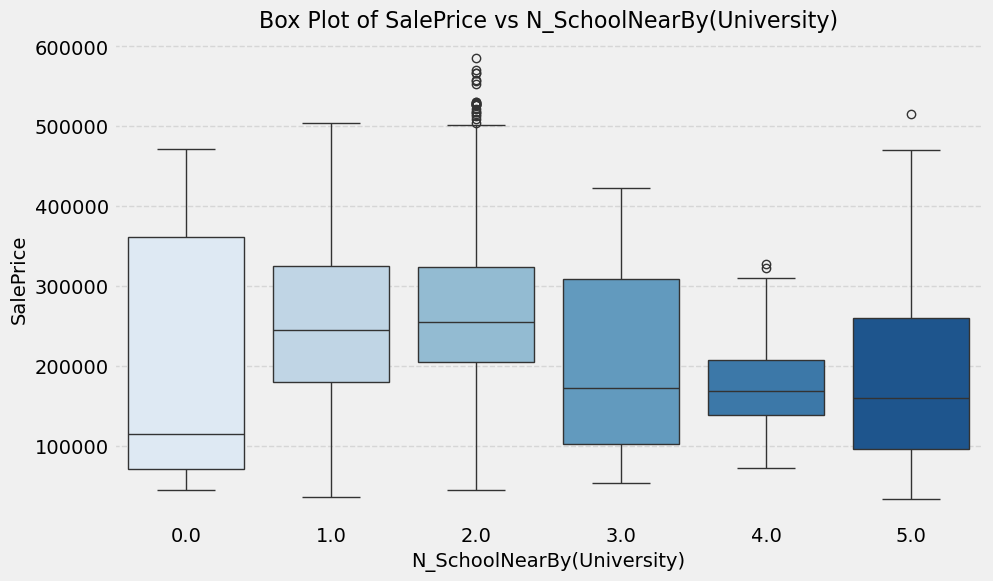

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


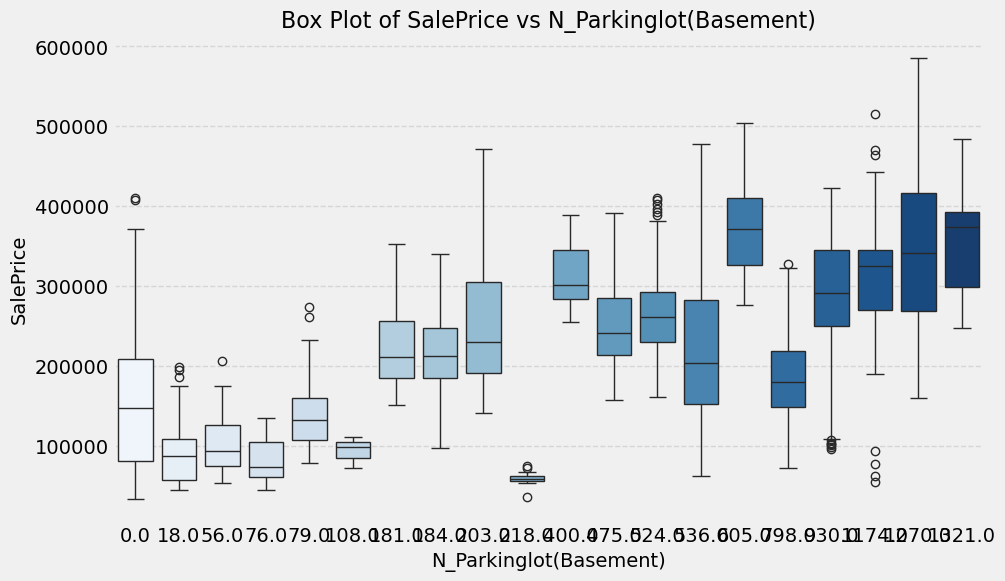

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


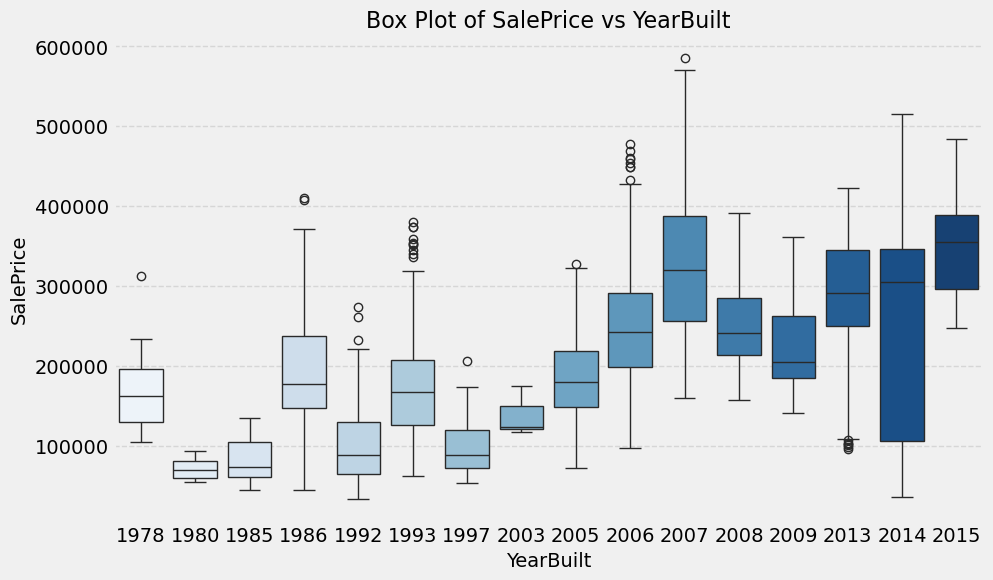

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


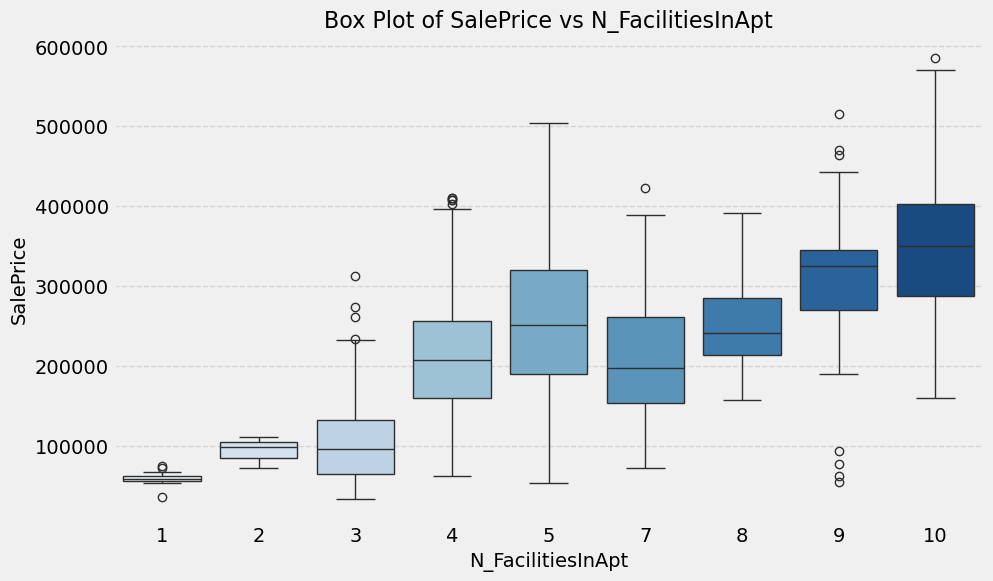

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


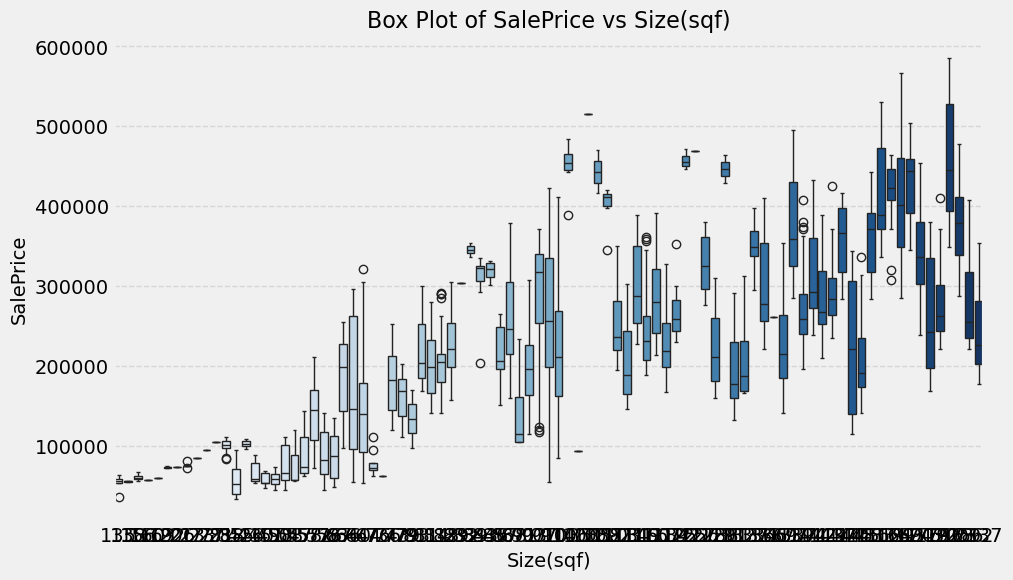

C:\Users\Farrel\AppData\Local\Temp\ipykernel_6108\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


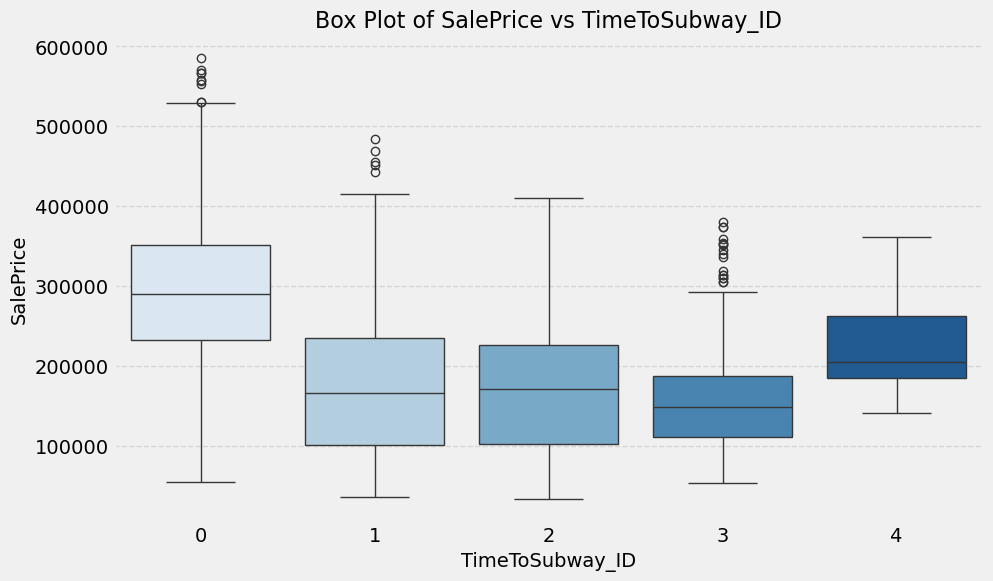

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_boxplots(df, target_column):
    """
    Visualize vertical box plots for each variable in the dataset against a target variable.
    
    Args:
        df (DataFrame): The input DataFrame.
        target_column (str): The target column (Y-axis).
    """
    # Iterate over each column except the target column
    for column in df.columns:
        if column != target_column:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=column, y=target_column, palette='Blues')
            plt.title(f'Box Plot of {target_column} vs {column}', fontsize=16)
            plt.xlabel(column, fontsize=14)
            plt.ylabel(target_column, fontsize=14)
            
            # Rotate X-axis labels for non-numeric features
            if df[column].dtype not in ['int64', 'float64']:
                plt.xticks(rotation=45)
            
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

# Example usage
visualize_boxplots(df, target_column='SalePrice')

## Convert Float columns into int64
This is because all data are whole numbers

In [133]:
for column in df.columns:
    if df[column].dtype == 'float64':  # Check if column is float64
        df[column] = df[column].astype('int64')  # Convert to int64
#Recheck DF types
df.shape, df.dtypes

((2701, 12),
 HallwayType                         object
 TimeToSubway                        object
 SubwayStation                       object
 N_FacilitiesNearBy(ETC)              int64
 N_FacilitiesNearBy(PublicOffice)     int64
 N_SchoolNearBy(University)           int64
 N_Parkinglot(Basement)               int64
 YearBuilt                            int64
 N_FacilitiesInApt                    int64
 Size(sqf)                            int64
 SalePrice                            int64
 TimeToSubway_ID                      int64
 dtype: object)

## Check for Outliers

In [69]:
# Filter columns with dtype 'int64' and 'float64
df_int64 = df.select_dtypes(include=['int64', 'float64'])

# Calculate Quartiles and IQR
Q3 = df_int64.quantile(0.75)
Q1 = df_int64.quantile(0.25)
IQR = Q3 - Q1

# Print Quartiles and IQR
print("Q1 (25th Percentile):\n", Q1)
print("\nQ3 (75th Percentile):\n", Q3)
print("\nIQR (Q3 - Q1):\n", IQR)

# Calculate Outliers
Jumlah_Outlier = []

for col in df_int64.columns:
    outliers = ((df_int64[col] < (Q1[col] - 1.5 * IQR[col])) | (df_int64[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([col, outliers, outliers / len(df_int64)])

# Generate the output DataFrame
outlier_df = pd.DataFrame(
    Jumlah_Outlier,
    columns=['Column', 'Outlier', 'Percentage']
).sort_values(by=['Percentage'], ascending=False, ignore_index=True)

print("\nOutliers Summary:")
print(outlier_df)


Q1 (25th Percentile):
 N_FacilitiesNearBy(ETC)                  0.0
N_FacilitiesNearBy(PublicOffice)         3.0
N_SchoolNearBy(University)               2.0
N_Parkinglot(Basement)                 181.0
YearBuilt                             1993.0
N_FacilitiesInApt                        4.0
Size(sqf)                              743.0
SalePrice                           153539.0
TimeToSubway_ID                          0.0
Name: 0.25, dtype: float64

Q3 (75th Percentile):
 N_FacilitiesNearBy(ETC)                  5.0
N_FacilitiesNearBy(PublicOffice)         5.0
N_SchoolNearBy(University)               4.0
N_Parkinglot(Basement)                 798.0
YearBuilt                             2007.0
N_FacilitiesInApt                        7.0
Size(sqf)                             1167.0
SalePrice                           300884.0
TimeToSubway_ID                          2.0
Name: 0.75, dtype: float64

IQR (Q3 - Q1):
 N_FacilitiesNearBy(ETC)                  5.0
N_FacilitiesNearBy(PublicOf

It was revealed that outliers are present, but we decided not to alter them as they only make up less than 1 percent of data.

In [72]:
def find_extremes_all_columns(df):
    extremes = {}
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Only consider numeric columns
            min_value = df[column].min()
            max_value = df[column].max()
            extremes[column] = (min_value, max_value)
    return extremes

extremes = find_extremes_all_columns(df)

for column, (min_val, max_val) in extremes.items():
    print(f"Column: {column}, Minimum: {min_val}, Maximum: {max_val}")

Column: N_FacilitiesNearBy(ETC), Minimum: 0.0, Maximum: 5.0
Column: N_FacilitiesNearBy(PublicOffice), Minimum: 0.0, Maximum: 7.0
Column: N_SchoolNearBy(University), Minimum: 0.0, Maximum: 5.0
Column: N_Parkinglot(Basement), Minimum: 0.0, Maximum: 1321.0
Column: YearBuilt, Minimum: 1978, Maximum: 2015
Column: N_FacilitiesInApt, Minimum: 1, Maximum: 10
Column: Size(sqf), Minimum: 135, Maximum: 2337
Column: SalePrice, Minimum: 32743, Maximum: 585840
Column: TimeToSubway_ID, Minimum: 0, Maximum: 4


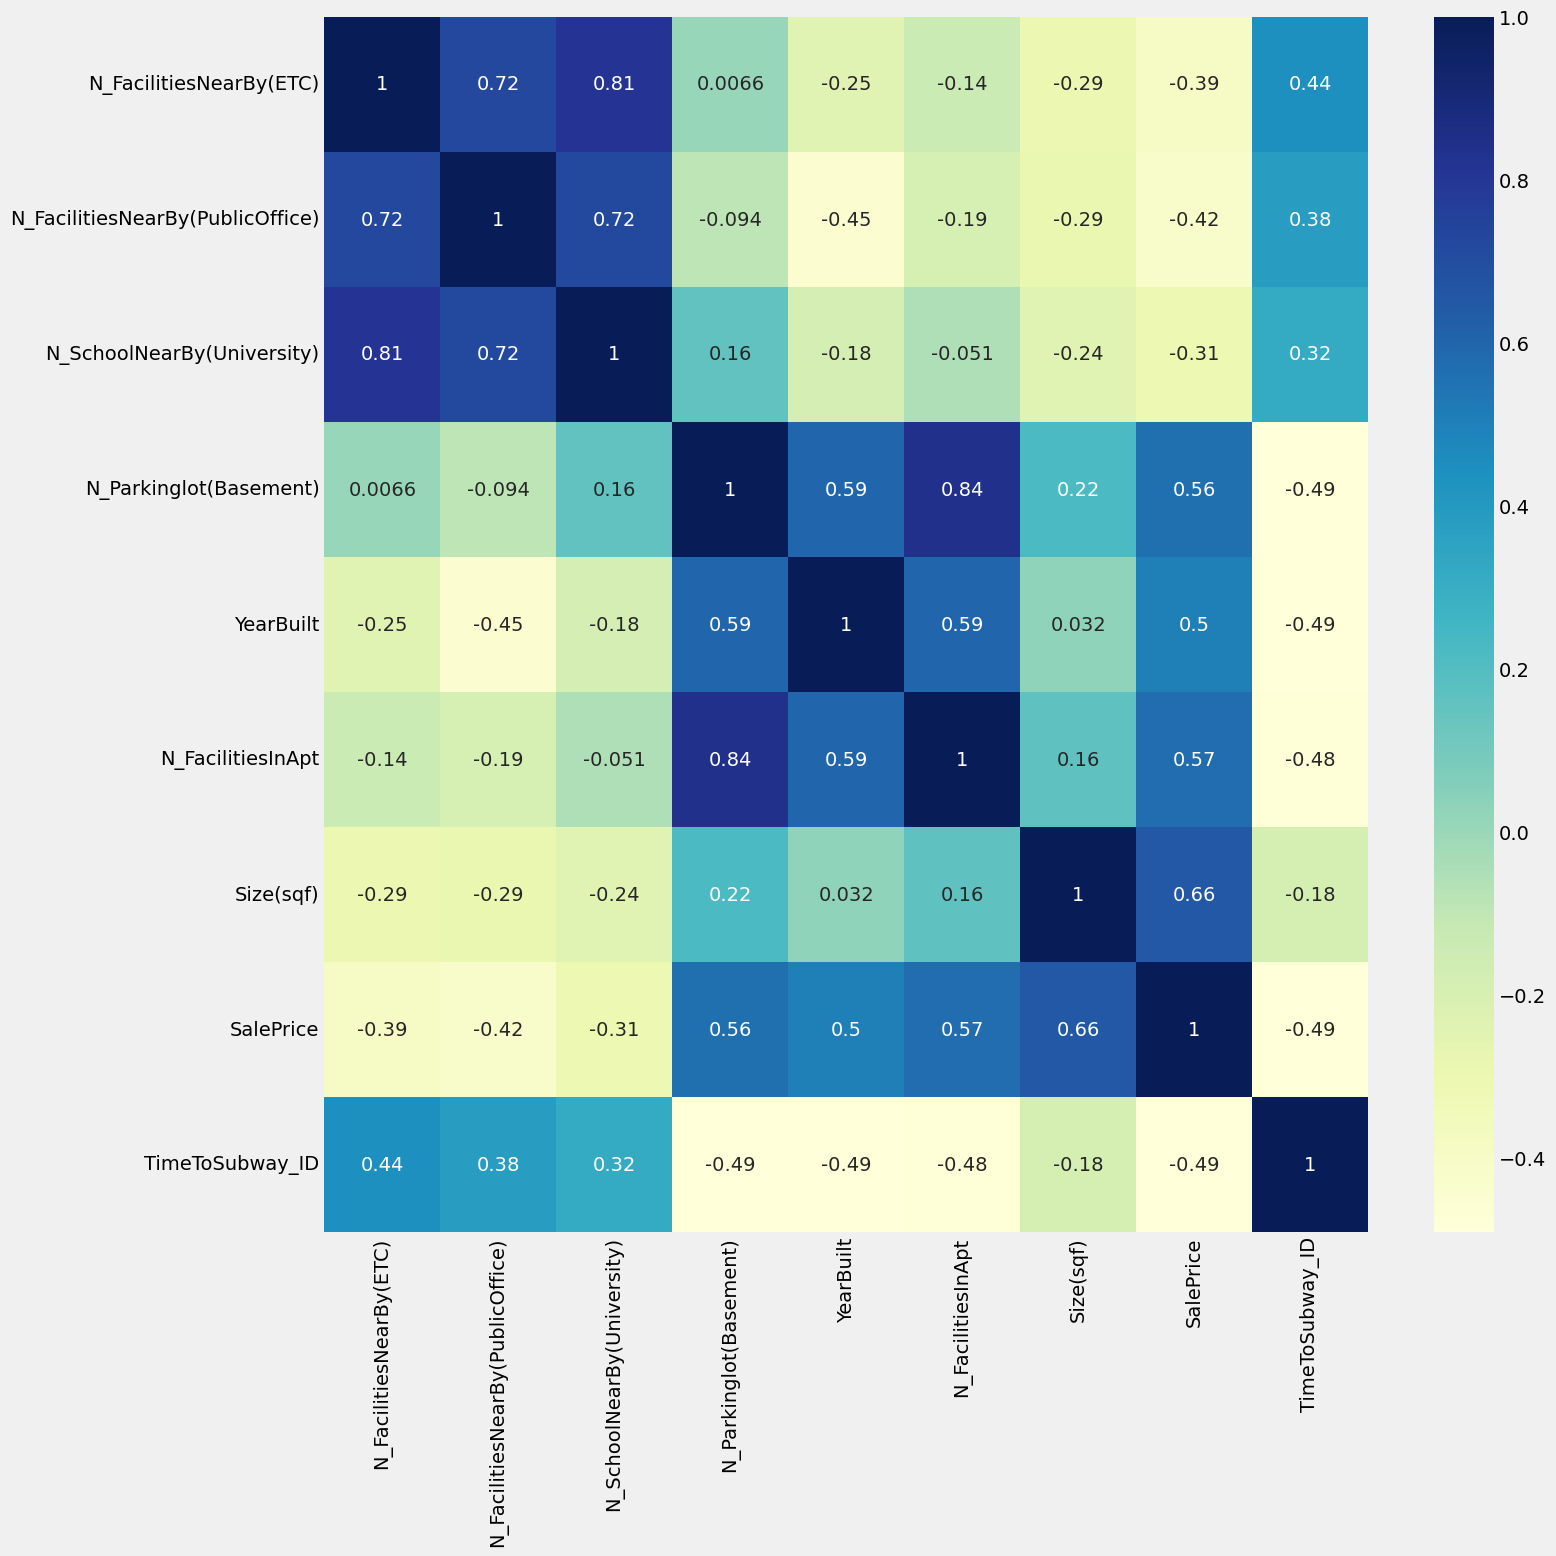

In [40]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,15))

# plotting correlation heatmap
dataplot = sns.heatmap(df_int64.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

* Strong positive correlation between SchoolNearBy and FacilitiesNearby.
* Strong negative correlation between YearBilt and FacilitiesNearby
* Correlation is present between SalePrice and each other data

In [74]:
df.select_dtypes(include=['object']).T.apply(lambda x: x.unique(), axis=1)

HallwayType                            [terraced, mixed, corridor]
TimeToSubway     [0-5min, 10min~15min, 15min~20min, 5min~10min,...
SubwayStation    [Kyungbuk_uni_hospital, Chil-sung-market, Bang...
dtype: object

# Import Machine Learning libraries

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Feature Selection & Engineering
##  1. Feature Encoding

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap

In [103]:
# Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, columns=["HallwayType", "TimeToSubway", "SubwayStation"], drop_first=True)


# Train Test Split

In [105]:
# Define features and target variable
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 2. Feature Scaling to ensure they are on the same scale

In [107]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model.score(X_test, y_test)
print(f"R^2 Score on Test Set: {test_score:.2f}")


R^2 Score on Test Set: 0.78


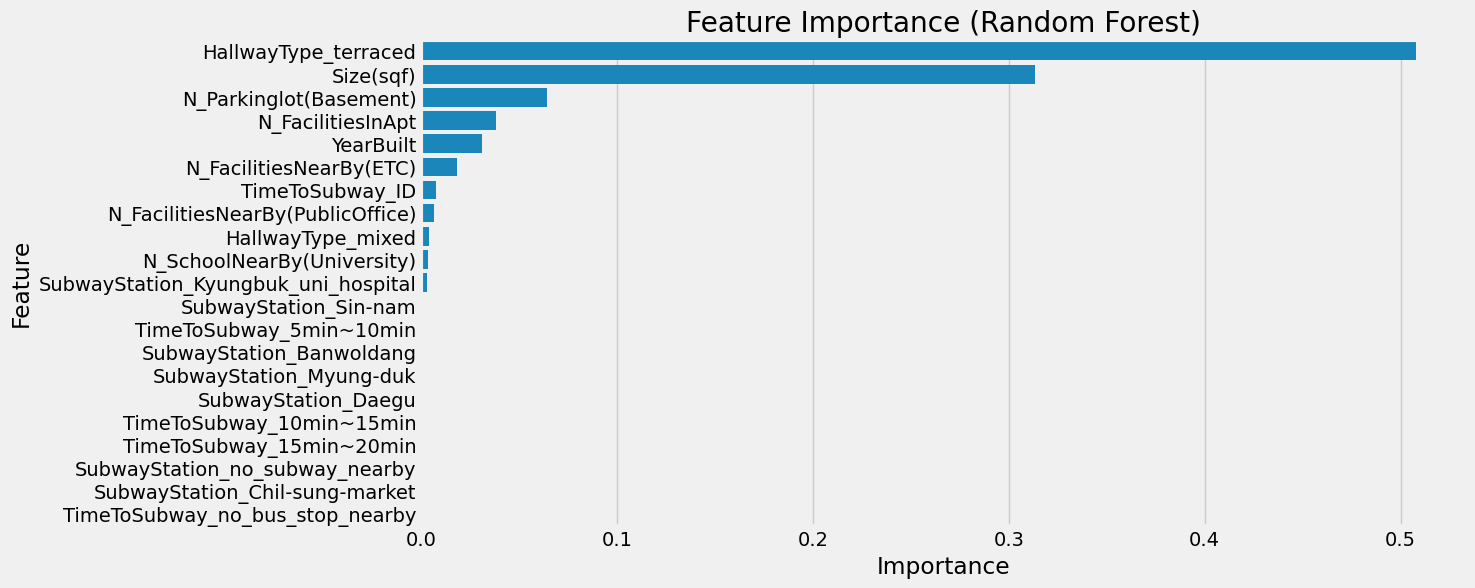

In [109]:
# Get feature importance from the model
importance = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": importance}).sort_values(by="Importance", ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance (Random Forest)")
plt.show()


# SHAP Analysis
for a more detailed explanation of feature impacts.


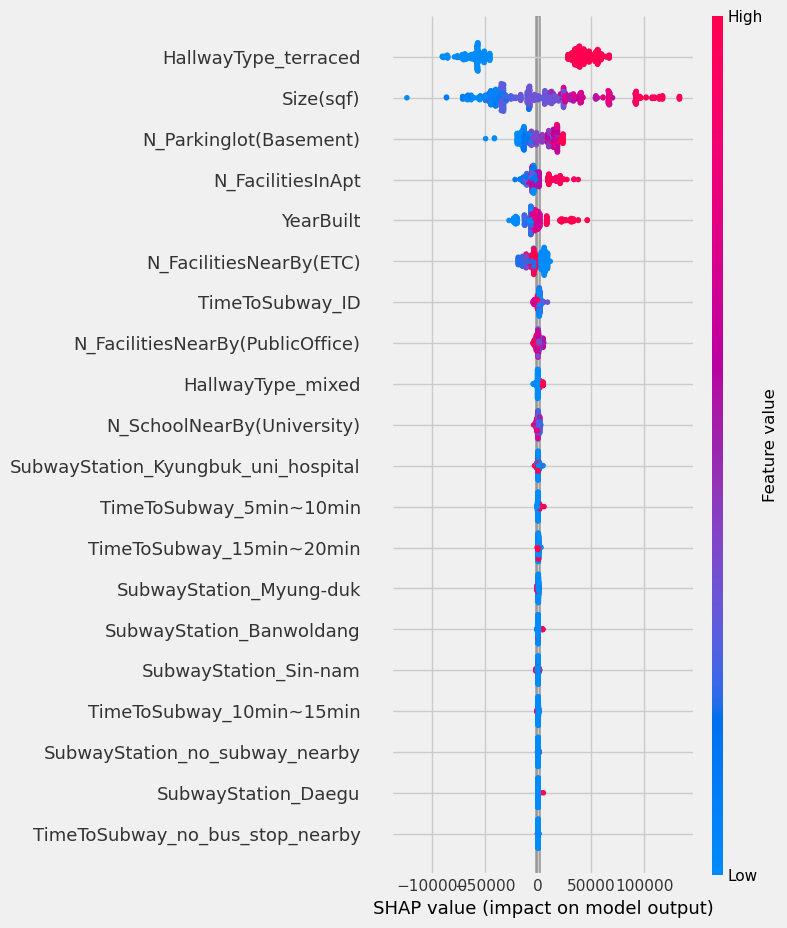

In [111]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


## Feature Importance

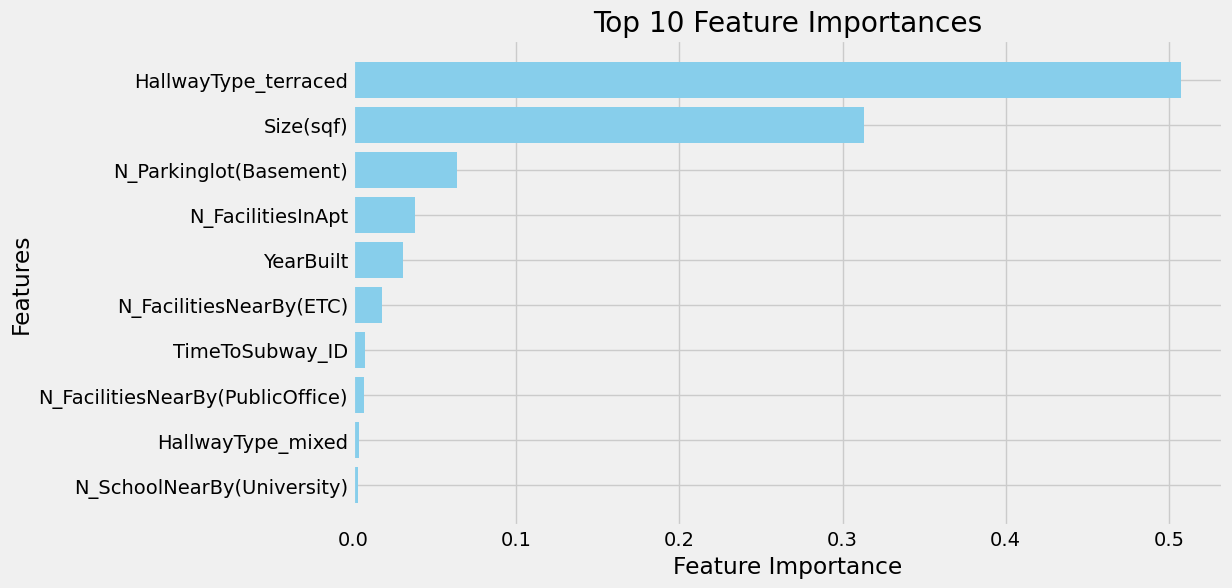

                                Feature  Importance
9                  HallwayType_terraced    0.507688
6                             Size(sqf)    0.313229
3                N_Parkinglot(Basement)    0.064017
5                     N_FacilitiesInApt    0.037958
4                             YearBuilt    0.030862
0               N_FacilitiesNearBy(ETC)    0.018048
7                       TimeToSubway_ID    0.007663
1      N_FacilitiesNearBy(PublicOffice)    0.006651
8                     HallwayType_mixed    0.003799
2            N_SchoolNearBy(University)    0.003322
17  SubwayStation_Kyungbuk_uni_hospital    0.002702
19                SubwayStation_Sin-nam    0.000792
12              TimeToSubway_5min~10min    0.000752
14             SubwayStation_Banwoldang    0.000704
18              SubwayStation_Myung-duk    0.000532
16                  SubwayStation_Daegu    0.000337
10             TimeToSubway_10min~15min    0.000281
11             TimeToSubway_15min~20min    0.000253
20       Sub

In [115]:
# Feature importance analysis
def plot_feature_importance(model, feature_names, top_n=10):
    # Get feature importances from the trained model
    feature_importances = model.feature_importances_

    # Create a DataFrame to organize feature importance values
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Plot the top N most important features
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:top_n], importance_df['Importance'][:top_n], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Top {} Feature Importances'.format(top_n))
    plt.gca().invert_yaxis()  # Reverse the order for better readability
    plt.show()

    return importance_df

# Example usage
feature_names = X_train.columns  # Replace with your feature column names
feature_importance_df = plot_feature_importance(model, feature_names)

# Display the DataFrame with sorted feature importance
print(feature_importance_df)

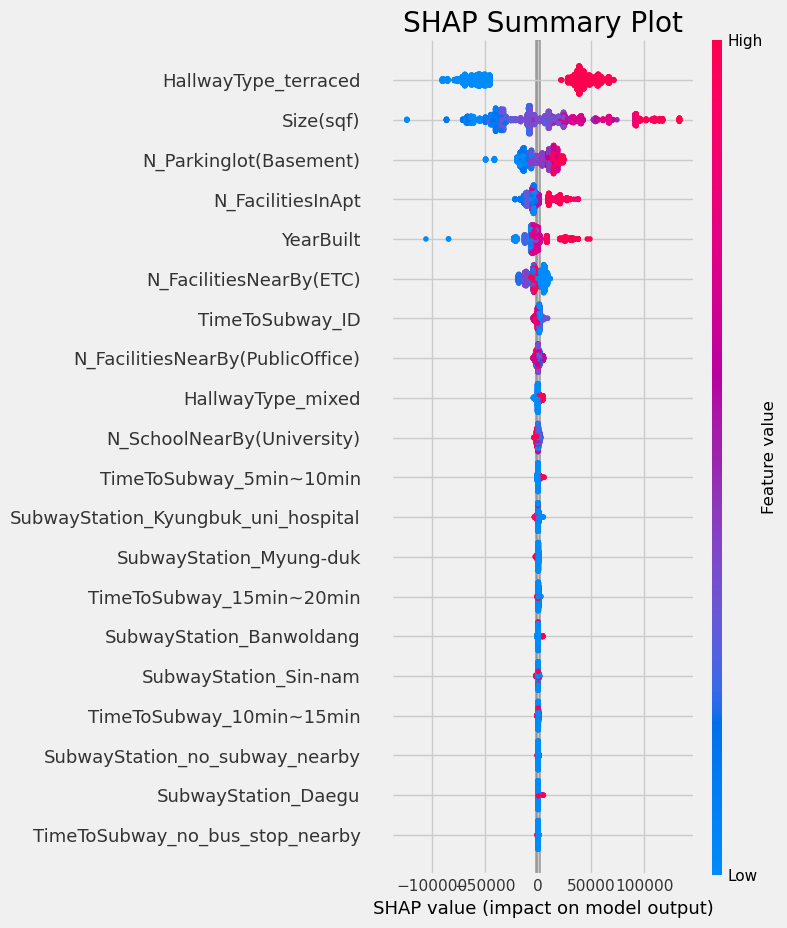

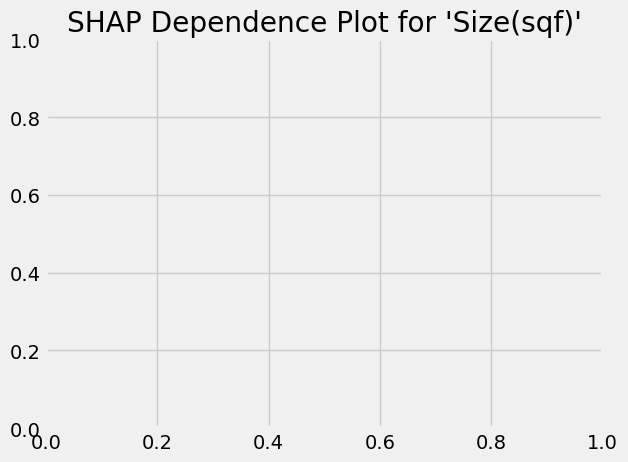

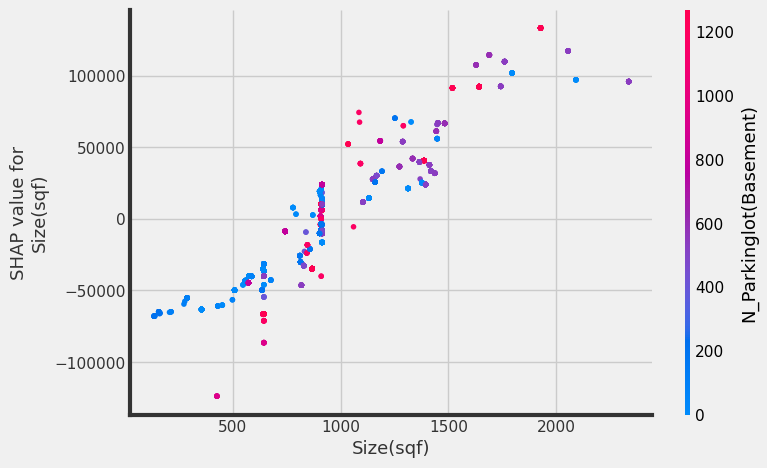

In [117]:
import shap

# SHAP analysis
def shap_summary_analysis(model, X_train):
    # Initialize SHAP explainer
    explainer = shap.TreeExplainer(model)

    # Compute SHAP values
    shap_values = explainer.shap_values(X_train)

    # SHAP summary plot
    plt.title("SHAP Summary Plot")
    shap.summary_plot(shap_values, X_train)

    # SHAP dependence plot (optional for a specific feature)
    # Replace 'Size(sqf)' with a feature name you want to analyze
    plt.title("SHAP Dependence Plot for 'Size(sqf)'")
    shap.dependence_plot('Size(sqf)', shap_values, X_train)

# Example usage
shap_summary_analysis(model, X_train)


## 3. Define features and target

In [82]:
X = df_scaled.drop(columns='SalePrice')  # Features
y = df_scaled['SalePrice']              # Target

## 4. Train-Test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Algorithm Selection
## 1. Linear Regressions

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

## 2. Random Forest Regressor

In [88]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## Evaluation Metrics
* Mean Absolute Error (MAE)

    Measures the average magnitude of errors.

* Mean Squared Error (MSE)

    Penalizes larger errors more significantly.

* R² Score

    Indicates how much variance in the target variable is explained by the model

In [206]:
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")
    print("-" * 30)

# Evaluate Linear Regression
evaluate_model("Linear Regression", y_test, y_pred_lr)

# Evaluate Random Forest Regressor
evaluate_model("Random Forest Regressor", y_test, y_pred_rf)


Linear Regression Performance:
MAE: 0.44727790906868486
MSE: 0.2900373925394308
R²: 0.6986322708092143
------------------------------
Random Forest Regressor Performance:
MAE: 0.3700938262041952
MSE: 0.20782744272728151
R²: 0.7840537596553727
------------------------------


In [208]:
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"Random Forest Cross-Validation R² Scores: {cv_scores_rf}")
print(f"Mean R² Score: {np.mean(cv_scores_rf)}")


Random Forest Cross-Validation R² Scores: [0.82101127 0.80667169 0.81220695 0.79495694 0.77911503]
Mean R² Score: 0.8027923782697419
